# Part I

In [1]:
import pickle
import numpy as np

In [7]:
with open('..\\NLP\\UPDATED_NLP_COURSE\\06-Deep-Learning\\train_qa.txt', 'rb') as f:
    train_data = pickle.load(f)          # a list of tuples

In [8]:
with open('..\\NLP\\UPDATED_NLP_COURSE\\06-Deep-Learning\\test_qa.txt', 'rb') as f:
    test_data = pickle.load(f)

In [9]:
# grab the first tuple
train_data[0]

(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 'no')

In [10]:
' '.join(train_data[0][0])

'Mary moved to the bathroom . Sandra journeyed to the bedroom .'

In [11]:
all_data = train_data + test_data
len(all_data)

11000

In [18]:
vocab = set()
for story, question, answer in all_data:
    vocab = vocab.union(set(story))
    vocab = vocab.union(set(question))

In [19]:
vocab.add('no')
vocab.add('yes')

In [20]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [21]:
vocab_len  = len(vocab) + 1    # + 1 is the placeholder
vocab_len

38

In [23]:
# Calculate the longest story
# for every tuple grab a story and check the length of the story
all_story_lens = [len(data[0]) for data in all_data]

In [24]:
max_story_len = max(all_story_lens)

In [42]:
# Calculate the longest question
max_question_len = max([len(data[1]) for data in all_data])
max_question_len

6

# Part II

In [26]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


In [27]:
tokenizer = Tokenizer(filters=[])
tokenizer.fit_on_texts(vocab)

In [28]:
tokenizer.word_index

{'mary': 1,
 'no': 2,
 'picked': 3,
 'is': 4,
 'took': 5,
 'journeyed': 6,
 'left': 7,
 'the': 8,
 'bedroom': 9,
 'yes': 10,
 'to': 11,
 'john': 12,
 'went': 13,
 'sandra': 14,
 'back': 15,
 'put': 16,
 'daniel': 17,
 'kitchen': 18,
 'in': 19,
 'dropped': 20,
 'apple': 21,
 'garden': 22,
 'there': 23,
 '?': 24,
 'got': 25,
 'discarded': 26,
 'milk': 27,
 'down': 28,
 '.': 29,
 'moved': 30,
 'travelled': 31,
 'hallway': 32,
 'bathroom': 33,
 'up': 34,
 'office': 35,
 'football': 36,
 'grabbed': 37}

In [29]:
train_story_text = []
train_question_text = []
train_answers = []

In [31]:
for story, question, answer in train_data:
    train_story_text.append(story)
    train_question_text.append(question)
    train_answers.append(answer)

In [32]:
train_story_seq = tokenizer.texts_to_sequences(train_story_text)

In [33]:
len(train_story_seq)

10001

In [43]:
def vectorize_stories(
    data, word_index=tokenizer.word_index, max_story_len=max_story_len,max_question_len=max_question_len):
    '''
    INPUT: 
    
    data: consisting of Stories,Queries,and Answers
    word_index: word index dictionary from tokenizer
    max_story_len: the length of the longest story (used for pad_sequences function)
    max_question_len: length of the longest question (used for pad_sequences function)


    OUTPUT:
    
    Vectorizes the stories,questions, and answers into padded sequences. We first loop for every story, query , and
    answer in the data. Then we convert the raw words to an word index value. Then we append each set to their appropriate
    output list. Then once we have converted the words to numbers, we pad the sequences so they are all of equal length.
    
    Returns this in the form of a tuple (X,Xq,Y) (padded based on max lengths)
    '''
    
    
    # X = STORIES
    X = []
    # Xq = QUERY/QUESTION
    Xq = []
    # Y = CORRECT ANSWER
    Y = []
    
    
    for story, query, answer in data:
        
        # Grab the word index for every word in story
        x = [word_index[word.lower()] for word in story]
        # Grab the word index for every word in query
        xq = [word_index[word.lower()] for word in query]
        
        # Grab the Answers (either Yes/No so we don't need to use list comprehension here)
        # Index 0 is reserved so we're going to use + 1
        y = np.zeros(len(word_index) + 1)
        
        # Now that y is all zeros and we know its just Yes/No , we can use numpy logic to create this assignment
        #
        y[word_index[answer]] = 1
        
        # Append each set of story,query, and answer to their respective holding lists
        X.append(x)
        Xq.append(xq)
        Y.append(y)
        
    # Finally, pad the sequences based on their max length so the RNN can be trained on uniformly long sequences.
        
    # RETURN TUPLE FOR UNPACKING
    return (
        pad_sequences(X, maxlen = max_story_len), 
        pad_sequences(Xq, maxlen = max_question_len), 
        np.array(Y)
    )

In [44]:
inputs_train, queries_train, answers_train = vectorize_stories(train_data)

In [45]:
inputs_test, queries_test, answers_test = vectorize_stories(test_data)

In [46]:
tokenizer.word_index['yes']

10

In [47]:
tokenizer.word_index['no']

2

In [48]:
sum(answers_test)

array([  0.,   0., 503.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 497.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.])

# Part III

In [49]:
from keras.models import Sequential, Model
from keras.layers.embeddings import Embedding
from keras.layers import Input, Activation, Dense, Permute, Dropout, add, dot, concatenate, LSTM

In [50]:
# PLACEHOLDER 
input_sequence = Input((max_story_len,))
question = Input((max_question_len, ))

In [51]:
vocab_size = len(vocab) + 1

In [52]:
# Input encoder M
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_size, output_dim=64))
input_encoder_m.add(Dropout(0.3))              #helps with overfitting

# Output : (samples, story_max_len, embedding_dim)

Instructions for updating:
Colocations handled automatically by placer.


In [53]:
# Input encoder C
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_size, output_dim=max_question_len))
input_encoder_c.add(Dropout(0.3))              #helps with overfitting

# Output : (samples, story_max_len, max_question_len)

In [55]:
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim=vocab_size, output_dim=64, input_length=max_question_len))
question_encoder.add(Dropout(0.3))

# Output: (samples, query_max_len, embedding_dim)

In [56]:
# ENCODER <-------- ENCODER(INPUT)
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

In [57]:
match = dot([input_encoded_m, question_encoded], axes=(2,2))
match = Activation('softmax')(match)

In [58]:
response = add([match, input_encoded_c])
response = Permute((2,1))(response)

In [59]:
answer = concatenate([response, question_encoded])

In [60]:
answer = LSTM(32)(answer)

In [61]:
answer = Dropout(0.5)(answer)
answer = Dense(vocab_size)(answer)

In [62]:
answer = Activation('softmax')(answer)

In [63]:
model = Model([input_sequence, question], answer)

In [65]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [66]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 156)          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 6)            0                                            
__________________________________________________________________________________________________
sequential_1 (Sequential)       multiple             2432        input_1[0][0]                    
__________________________________________________________________________________________________
sequential_4 (Sequential)       (None, 6, 64)        2432        input_2[0][0]                    
____________________________________________________________________________________________

# Part IV

In [68]:
history = model.fit(
    [inputs_train, queries_train], 
    answers_train, 
    batch_size=32, 
    epochs=3,
    validation_data=([inputs_test, queries_test], answers_test)
)  

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Train on 10000 samples, validate on 1000 samples
Epoch 1/3
10000/10000 [==============================] - 4s 427us/step - loss: 0.9526 - accuracy: 0.4997 - val_loss: 0.6959 - val_accuracy: 0.5030
Epoch 2/3
10000/10000 [==============================] - 3s 296us/step - loss: 0.7073 - accuracy: 0.4965 - val_loss: 0.6933 - val_accuracy: 0.5030
Epoch 3/3
10000/10000 [==============================] - 3s 312us/step - loss: 0.6964 - accuracy: 0.5039 - val_loss: 0.6932 - val_accuracy: 0.4970


dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


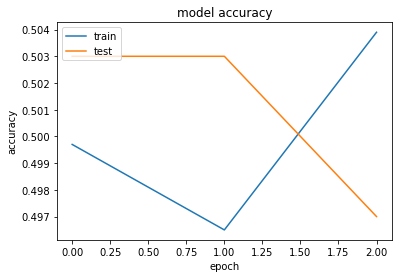

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [72]:
model.load_weights('..\\NLP\\UPDATED_NLP_COURSE\\06-Deep-Learning\\chatbot_10.h5')

In [73]:
pred_results = model.predict((
    # a tuple of new story and new question
    [inputs_test, queries_test]
))

In [74]:
test_data

[(['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.',
   'Daniel',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'garden', '?'],
  'yes'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',


In [75]:
pred_results.shape

(1000, 38)

In [76]:
val_max = np.argmax(pred_results[0])

In [78]:
for key,val in tokenizer.word_index.items():
    if val == val_max:
        k = key

In [79]:
k

'journeyed'

In [80]:
pred_results[0][val_max]

0.9999255

In [95]:
my_story = "John left the kitchen . Sandra dropped the football in the garden ."

In [96]:
my_story.split()

['John',
 'left',
 'the',
 'kitchen',
 '.',
 'Sandra',
 'dropped',
 'the',
 'football',
 'in',
 'the',
 'garden',
 '.']

In [97]:
my_question = "Is the football in the garden ?"

In [98]:
my_question.split()

['Is', 'the', 'football', 'in', 'the', 'garden', '?']

In [99]:
my_data = [(my_story.split(), my_question.split(), 'yes')]
my_data

[(['John',
   'left',
   'the',
   'kitchen',
   '.',
   'Sandra',
   'dropped',
   'the',
   'football',
   'in',
   'the',
   'garden',
   '.'],
  ['Is', 'the', 'football', 'in', 'the', 'garden', '?'],
  'yes')]

In [100]:
my_story, my_ques, my_ans = vectorize_stories(my_data)
my_ans

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.]])

In [102]:
pred_results = model.predict([my_story, my_ques])

In [103]:
val_max = np.argmax(pred_results[0])

In [104]:
for key,val in tokenizer.word_index.items():
    if val == val_max:
        k = key

In [105]:
key

'grabbed'

In [106]:
pred_results[0][val_max]

0.9997845